In [1]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with h5py.File("cell_feature_matrix_v1.h5", "r") as f1:
    keys = list(f1.keys())

In [3]:
print(keys)

['matrix']


In [4]:
import h5py

with h5py.File("cell_feature_matrix_v1.h5", "r") as f1:
    matrix_group = f1['matrix']  # 'matrix' is a group, not a dataset
    print("Datasets inside 'matrix' group:", list(matrix_group.keys()))

Datasets inside 'matrix' group: ['barcodes', 'data', 'features', 'indices', 'indptr', 'shape']


In [5]:
with h5py.File("cell_feature_matrix_v1.h5", "r") as f1:
    matrix_group = f1['matrix']


    shape = matrix_group['shape'][:]
    print("Shape from HDF5 file:", shape)

    print("Length of 'data':", len(matrix_group['data']))
    print("Length of 'indices':", len(matrix_group['indices']))
    print("Length of 'indptr':", len(matrix_group['indptr']))


Shape from HDF5 file: [   541 278659]
Length of 'data': 9437425
Length of 'indices': 9437425
Length of 'indptr': 278660


In [6]:
from scipy.sparse import csc_matrix

with h5py.File("cell_feature_matrix_v1.h5", "r") as f1:
    matrix_group = f1['matrix']

    data = matrix_group['data'][:]
    indices = matrix_group['indices'][:]
    indptr = matrix_group['indptr'][:].ravel()  # Ensure 1D
    shape = tuple(matrix_group['shape'][:])  # Convert to tuple

    # Load as CSC matrix
    expression_matrix_csc = csc_matrix((data, indices, indptr), shape=shape)

    # Convert to CSR
    expression_matrix = expression_matrix_csc.tocsr()

print("Expression matrix shape:", expression_matrix.shape)

Expression matrix shape: (541, 278659)


In [7]:
with h5py.File("cell_feature_matrix_v1.h5", "r") as f1:
    matrix_group = f1['matrix']

    # Check if 'features' is a dataset or a group
    if 'features' in matrix_group:
        features_obj = matrix_group['features']

        if isinstance(features_obj, h5py.Dataset):
            print("'features' is a dataset")
            gene_names = features_obj[:].astype(str)
        else:
            print("'features' is a group")
            # If 'features' is a group, check its contents
            print("Contents of 'features' group:", list(features_obj.keys()))
    else:
        print("'features' is not available in the matrix group")

'features' is a group
Contents of 'features' group: ['_all_tag_keys', 'feature_type', 'genome', 'id', 'name']


# Extract gene names

In [8]:
with h5py.File("cell_feature_matrix_v1.h5", "r") as f1:
    matrix_group = f1['matrix']

    features_group = matrix_group['features']
    if 'name' in features_group:
        gene_names = features_group['name'][:].astype(str)
    if 'barcodes' in matrix_group:
        cell_barcodes = matrix_group['barcodes'][:].astype(str)
        print("Cell barcodes extracted successfully!")
    else:
        print("'barcodes' dataset is not found in 'matrix' group.")


Cell barcodes extracted successfully!


In [9]:
print("Number of cell barcodes:", len(cell_barcodes))
print("Number of gene names:", len(gene_names))

Number of cell barcodes: 278659
Number of gene names: 541


In [10]:

df1 = pd.DataFrame(expression_matrix.T.toarray(), index=cell_barcodes, columns=gene_names)

print(df1.head())

            ACE  ACE2  ACKR1  ADAM17  ADAM28  ADAMTS1  ADGRL4  AGER  AGR3  \
aaaadcac-1    0     0      0       0       0        0       0     0     2   
aaaaieak-1    0     0      0       0       0        0       0     0    11   
aaaanbhm-1    2     0      0       5       0        0       0     0     1   
aaaankfe-1    0     0      0       1       0        0       0     0    27   
aaaankfi-1    0     0      0       0       0        0       0     0     0   

            AIF1  ...  UnassignedCodeword_0493  UnassignedCodeword_0494  \
aaaadcac-1     0  ...                        0                        0   
aaaaieak-1     0  ...                        0                        0   
aaaanbhm-1     2  ...                        0                        0   
aaaankfe-1     0  ...                        0                        0   
aaaankfi-1     0  ...                        0                        0   

            UnassignedCodeword_0495  UnassignedCodeword_0496  \
aaaadcac-1            

In [11]:
with h5py.File("cell_feature_matrix_v2.h5", "r") as f1:
    matrix_group = f1['matrix']


    shape = matrix_group['shape'][:]
    print("Shape from HDF5 file:", shape)

    print("Length of 'data':", len(matrix_group['data']))
    print("Length of 'indices':", len(matrix_group['indices']))
    print("Length of 'indptr':", len(matrix_group['indptr']))

Shape from HDF5 file: [ 10029 278328]
Length of 'data': 78464610
Length of 'indices': 78464610
Length of 'indptr': 278329


In [12]:
from scipy.sparse import csc_matrix

with h5py.File("cell_feature_matrix_v2.h5", "r") as f1:
    matrix_group = f1['matrix']

    data = matrix_group['data'][:]
    indices = matrix_group['indices'][:]
    indptr = matrix_group['indptr'][:].ravel()  # Ensure 1D
    shape = tuple(matrix_group['shape'][:])  # Convert to tuple

    # Load as CSC matrix
    expression_matrix_csc = csc_matrix((data, indices, indptr), shape=shape)

    # Convert to CSR
    expression_matrix = expression_matrix_csc.tocsr()

print("Expression matrix shape:", expression_matrix.shape)

Expression matrix shape: (10029, 278328)


In [13]:
with h5py.File("cell_feature_matrix_v2.h5", "r") as f1:
    matrix_group = f1['matrix']

    # Check if 'features' is a dataset or a group
    if 'features' in matrix_group:
        features_obj = matrix_group['features']

        if isinstance(features_obj, h5py.Dataset):
            print("'features' is a dataset")
            gene_names = features_obj[:].astype(str)
        else:
            print("'features' is a group")
            # If 'features' is a group, check its contents
            print("Contents of 'features' group:", list(features_obj.keys()))
    else:
        print("'features' is not available in the matrix group")

'features' is a group
Contents of 'features' group: ['_all_tag_keys', 'feature_type', 'genome', 'id', 'name']


In [14]:
with h5py.File("cell_feature_matrix_v2.h5", "r") as f1:
    matrix_group = f1['matrix']

    features_group = matrix_group['features']
    if 'name' in features_group:
        gene_names = features_group['name'][:].astype(str)
    if 'barcodes' in matrix_group:
        cell_barcodes = matrix_group['barcodes'][:].astype(str)
        print("Cell barcodes extracted successfully!")
    else:
        print("'barcodes' dataset is not found in 'matrix' group.")


Cell barcodes extracted successfully!


In [15]:
print("Number of cell barcodes:", len(cell_barcodes))
print("Number of gene names:", len(gene_names))

Number of cell barcodes: 278328
Number of gene names: 10029


In [16]:
df2 = pd.DataFrame(expression_matrix.T.toarray(), index=cell_barcodes, columns=gene_names)

print(df2.head())

            A2ML1  AAMP  AAR2  AARSD1  ABAT  ABCA1  ABCA3  ABCA4  ABCA7  \
aaaaadnb-1      0     0     0       0     0      0      0      0      0   
aaaabalp-1      0     0     0       0     0      0      0      0      0   
aaaadfei-1      0     0     0       0     0      0      0      0      0   
aaaadjia-1      0     0     0       0     0      0      0      0      0   
aaaafglb-1      0     0     0       2     0      0      0      0      1   

            ABCB1  ...  DeprecatedCodeword_18589  DeprecatedCodeword_18601  \
aaaaadnb-1      0  ...                         0                         0   
aaaabalp-1      0  ...                         0                         0   
aaaadfei-1      0  ...                         0                         0   
aaaadjia-1      0  ...                         0                         0   
aaaafglb-1      1  ...                         0                         0   

            DeprecatedCodeword_18609  DeprecatedCodeword_18616  \
aaaaadnb-1    

In [17]:


common_genes = df1.columns.intersection(df2.columns)

df1_common = df1[common_genes]
df2_common = df2[common_genes]

correlation_results = df1_common.corrwith(df2_common, axis=0)


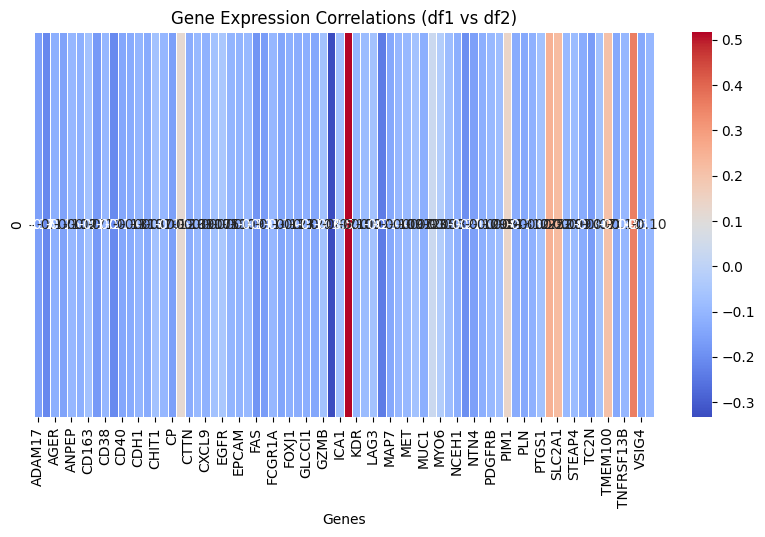

In [18]:
filtered_corr = correlation_results.dropna()

plt.figure(figsize=(10, 5))
sns.heatmap(filtered_corr.to_frame().T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Gene Expression Correlations (df1 vs df2)")
plt.xlabel("Genes")
plt.ylabel("")
plt.show()

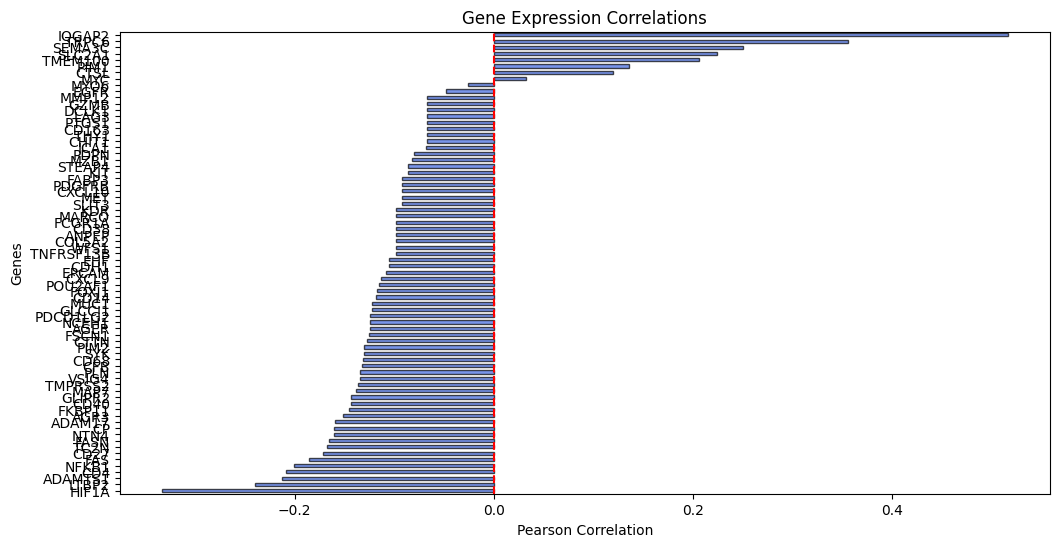

In [19]:
filtered_corr = correlation_results.dropna().sort_values()

plt.figure(figsize=(12, 6))
filtered_corr.plot(kind="barh", color="royalblue", edgecolor="black", alpha=0.7)
plt.axvline(x=0, color="red", linestyle="--")  # Reference line at 0 correlation
plt.title("Gene Expression Correlations")
plt.xlabel("Pearson Correlation")
plt.ylabel("Genes")
plt.show()

In [20]:
styled_table = correlation_results.to_frame(name="Correlation").style.background_gradient(cmap="coolwarm")
styled_table

,Correlation
ACE,nan
ACE2,nan
ADAM17,-0.159223
ADAM28,nan
ADAMTS1,-0.212942
ADGRL4,nan
AGER,-0.124035
AGR3,-0.151814
ANPEP,-0.097590
AQP9,nan


In [21]:
genes_v1 = set(df1.columns)
genes_v2 = set(df2.columns)

common_genes = genes_v1.intersection(genes_v2)
num_common_genes = len(common_genes)

print(f"Number of genes from v1 present in v2: {num_common_genes}")

Number of genes from v1 present in v2: 232
